In [17]:
import pandas as pd 

df = pd.read_csv('../data/data_scaled.csv')
df_2 = pd.read_csv('../data/not_scaled_data.csv')

Epoch 1/100


c:\Users\ALI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5955 - val_loss: 0.2558
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2480 - val_loss: 0.2219
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2356 - val_loss: 0.2065
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2020 - val_loss: 0.2025
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1772 - val_loss: 0.1897
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2138 - val_loss: 0.1846
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1765 - val_loss: 0.1805
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1634 - val_loss: 0.1856
Epoch 9/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1734 - val_loss: 0.1794
Epoch 10/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1386 - val_loss: 0.1704
Epoch 11/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1711 - val_loss: 0.1750
Epoch 12/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1403 - val_lo

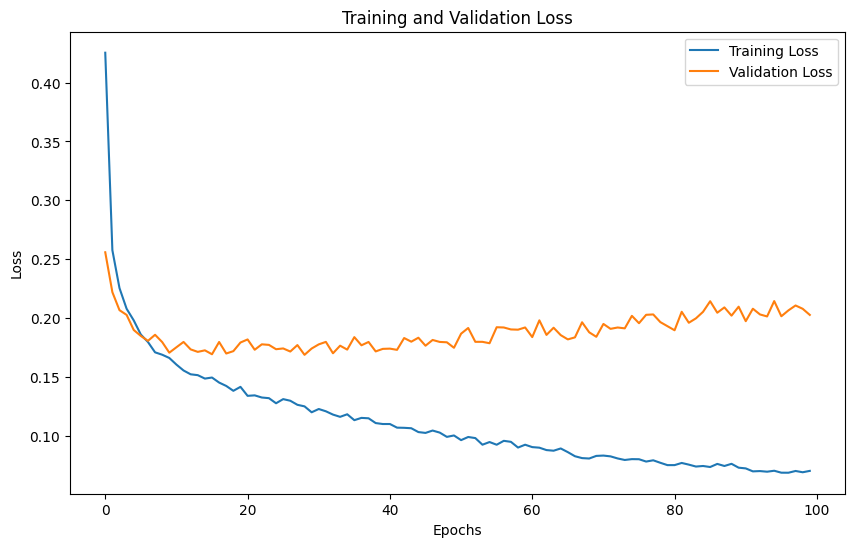

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Assume df is your original DataFrame
# Drop 'price' and 'log_taxAssessedValue' columns
features = df.drop(columns=['price', 'log_taxAssessedValue', 'log_price', 'taxAssessedValue'])
target = df['log_price']

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
import matplotlib.pyplot as plt

# Assume df is your original DataFrame
# Drop 'price' and 'log_taxAssessedValue' columns
features = df.drop(columns=['price', 'log_taxAssessedValue', 'log_price', 'taxAssessedValue'])
target = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.01))  # Add LeakyReLU activation with a small slope (alpha)
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))  # Add LeakyReLU activation with a small slope (alpha)
model.add(Dense(1))  # Output layer with no activation function for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/200


c:\Users\ALI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ALI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3081 - val_loss: 0.2290
Epoch 2/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2050 - val_loss: 0.1940
Epoch 3/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1956 - val_loss: 0.1898
Epoch 4/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1787 - val_loss: 0.1859
Epoch 5/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1796 - val_loss: 0.1814
Epoch 6/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1665 - val_loss: 0.1771
Epoch 7/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1691 - val_loss: 0.1785
Epoch 8/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1620 - val_loss: 0.1748
Epoch 9/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1633 - val_loss: 0.1748
Epoch 10/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1506 - val_loss: 0.1708
Epoch 11/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1507 - val_loss: 0.1766
Epoch 12/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1644 - val_lo

KeyboardInterrupt: 